In [10]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [11]:
# Define the function to aggregate and rank features
def rank_features(file_pattern, top_n=50):
    """
    Rank features across multiple files.
    Parameters:
        file_pattern (str): Glob pattern for matching files.
        top_n (int): Number of top features to consider from each file.
    Returns:
        pd.DataFrame: DataFrame containing ranked feature frequencies.
    """
    files = glob.glob(file_pattern)
    all_features = []

    # Loop through each file to collect top features
    for file in files:
        df = pd.read_csv(file)
        top_features = df.head(top_n)['Feature_ID'].tolist()
        all_features.extend(top_features)

    # Count feature occurrences
    feature_counts = pd.Series(all_features).value_counts()

    # Return as a DataFrame
    ranked_features = feature_counts.reset_index()
    ranked_features.columns = ['Feature_ID', 'Frequency']
    ranked_features = ranked_features.sort_values(by="Frequency", ascending=False)
    return ranked_features

In [12]:
# Rank features by model importance
model_importance_ranked = rank_features("results/*model_importance.csv", top_n=50)
model_importance_ranked.to_csv("results/model_importance_ranking.csv", index=False)

# Rank features by SHAP importance
shap_importance_ranked = rank_features("results/*SHAP_importance.csv", top_n=50)
shap_importance_ranked.to_csv("results/shap_importance_ranking.csv", index=False)

# Rank features combining both methods
combined_files = glob.glob("results/*importance.csv")
combined_ranked = rank_features("results/*importance.csv", top_n=50)
combined_ranked.to_csv("results/combined_importance_ranking.csv", index=False)


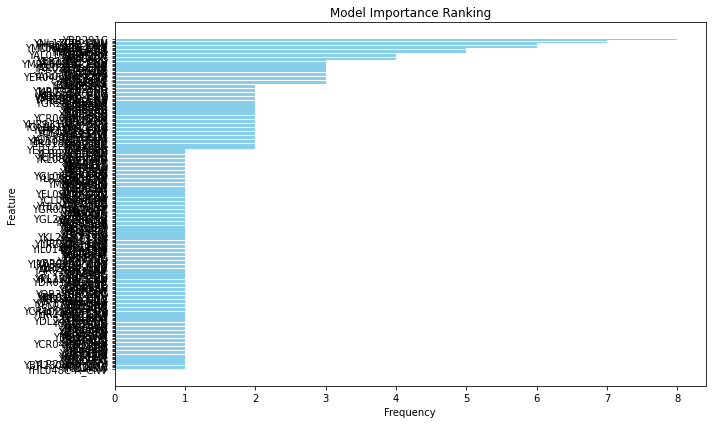

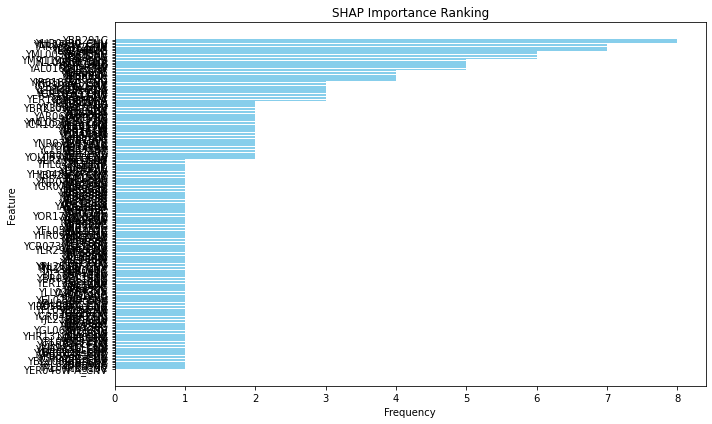

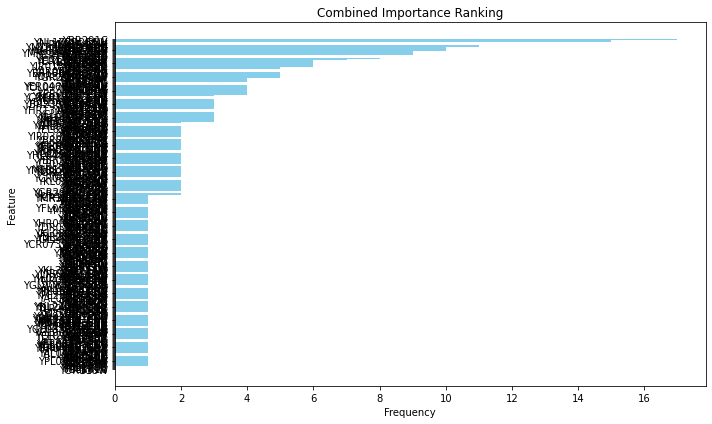

In [15]:
# Plotting function
def plot_feature_ranking(ranked_features, title, output_file):
    plt.figure(figsize=(10, 6))
    plt.barh(ranked_features['Feature_ID'], ranked_features['Frequency'], color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

# Plot results
plot_feature_ranking(model_importance_ranked, "Model Importance Ranking", "results/model_importance_ranking.png")
plot_feature_ranking(shap_importance_ranked, "SHAP Importance Ranking", "results/shap_importance_ranking.png")
plot_feature_ranking(combined_ranked, "Combined Importance Ranking", "results/combined_importance_ranking.png")